# Project: Investigate a Dataset - Appointment No-Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The [Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments) dataset contains information from 100,000 medical appointments in Brazil and is focused on whether or not patients showed up for their appointments. It also contains information about the patients, such as their medical conditions, gender, and age. The dataset contains the following columns:
- 'PatientID': is a unique identifier for each patient
- 'AppointmentID': is a unique identifier for each scheduled appointment
- 'Gender': the gender of each patient, coded as either M or F
- ‘ScheduledDay’: what day the patient set up their appointment
- 'AppointmentDay': the date of the appointment
- 'Age': how old the patient is
- ‘Neighborhood’: indicates the location of the hospital
- ‘Scholarship’: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família, coded as 1 = yes and 0 = no
- 'Hipertension' [sic]: whether or not the patient has hypertension, coded as 1 = yes and 0 = no
- 'Diabetes': whether or not the patient has hypertension, coded as 1 = yes and 0 = no
- 'Alcoholism': whether or not the patient has alcoholism, coded as 1 = yes and 0 = no
- 'Handcap' [sic]:  whether or not the patient has a handicap, coded as 1 = yes and 0 = no
- 'SMS_received': indicates whether the patient received a reminder text for their appointment, coded as 1 = yes and 0 = no
- 'No-show': indicates whether the patient showed up for the appointment; 'no' if they showed up to the appointment, and 'yes' if they did not show up



### Questions for Analysis
> What is the overall rate of no-shows?

> Do reminder texts messages improve attendance?

> Does the day of the week impact the no-show rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

First, we need to load the dataset and explore its format and size. We will then check for any issues that may prevent analysis. We will clean the data by addressing typos and outliers, as well as changing any datatypes that may need to be altered for easier analysis. 


### General Properties
In this section of the report, we will investigate the overall properties of this dataset, such as the number of entries, data types, and number of unique values.

In [2]:
# Loading the data and finding the number of rows and columns
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.shape)

(110527, 14)


We can see that there are 110,427 rows and 14 columns in this dataset. Using several different methods, we will now further explore the dataset.

In [3]:
# viewing the first five rows
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Viewing the first few rows allows us to see how the dataset is structured and the type of values each column contains.

In [4]:
# looking at the datatypes and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here we can see the datatypes assigned to each column. 

In [5]:
# counting the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Using .nunique allows us to view the number of unique entries in each column. Quite a few columns contain only two values, such as the 'Gender' column which contains either 'M' or 'F'. 

In [6]:
# checking for any null values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No values are missing.


### Data Cleaning
 
Hypertension and handicap are both mispelled in the column names, so these labels need to be corrected. ScheduledDay and AppointmentDay should be changed to a datetime datatype. This will make these columns easier to examine later. We also need to look for any outliers, such as negative numbers in the 'Age' column, and address these appropriately. 

In [7]:
# fixing typos in the column labels
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [8]:
# checking that our fix worked
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The column names are now spelled correctly.

In [9]:
# converting columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

We can now see that ScheduledDay and AppointmentDay are datetime datatypes

In [11]:
# looking for outliers in the age column - age cannot be a negative value
df.Age.max(), df.Age.min()

(115, -1)

It appears that one or more rows has a value of -1 in the age column. This must be an error. There are also one or more values of 115 in the 'Age' column, which is also unlikely. Let's fix these outliers.

In [12]:
# finding the rows that contain age less than zero
df.query('Age < 0')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
# finding the rows that contain age outliers
df.query('Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


There is one row containing a negative age value, and five rows containing an age of 115. The next oldest individuals are 102, so it is unlikely that 115 is accurate. We will replace these outlier values with the mean age.

In [14]:
# replacing negative values and ages of over 102 with the mean age
mean_age = df['Age'].mean()
df.loc[df['Age'] < 0, 'Age'] = mean_age
df.loc[df['Age'] > 102, 'Age'] = mean_age

In [15]:
# checking that the above operation worked
df.query('Age > 102' or 'Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


Now our queries for ages over 102 and for ages less than 0 returned no values as they have been replaced with the mean age.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will examine a few questions that arose after investigating the information contained in the dataset. Hopefully this analysis will reveal whether reminder texts are helpful to the hospitals' attendance rates and if there is any particular day of the week that has low attendance.

### Question 1: What is the overall rate of no-shows?

Text(0.5, 0, '')

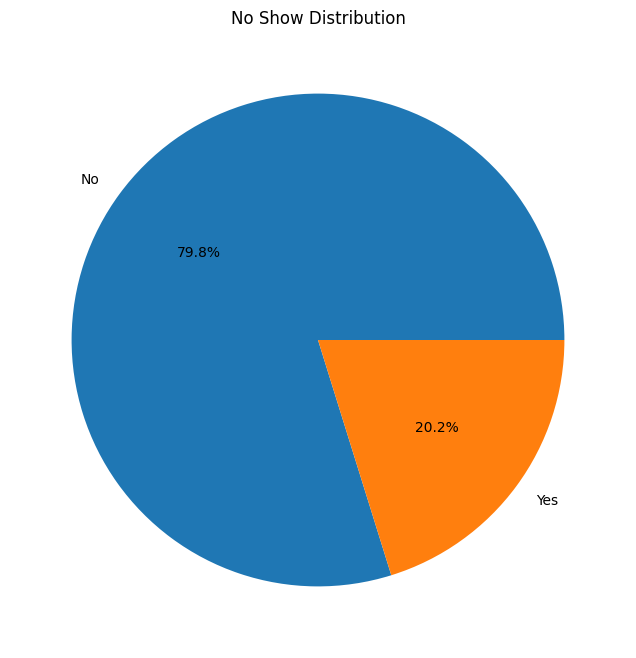

In [16]:
df['No_show'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', legend=False)
plt.title('No Show Distribution')
plt.ylabel('')
plt.xlabel('')

Our overall rate of no-shows is 20.2%.

### Question 2: Do reminder texts improve attendance?

In [17]:
# no = showed up for appointment, yes = was a no-show
df["No_show"].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [18]:
# 0 = did not receive a reminder, 1 = did receive a text reminder
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [19]:
# combining into one table
df.groupby(['No_show', 'SMS_received']).size().reset_index(name='Count')


,No_show,SMS_received,Count
0,No,0,62510
1,No,1,25698
2,Yes,0,12535
3,Yes,1,9784


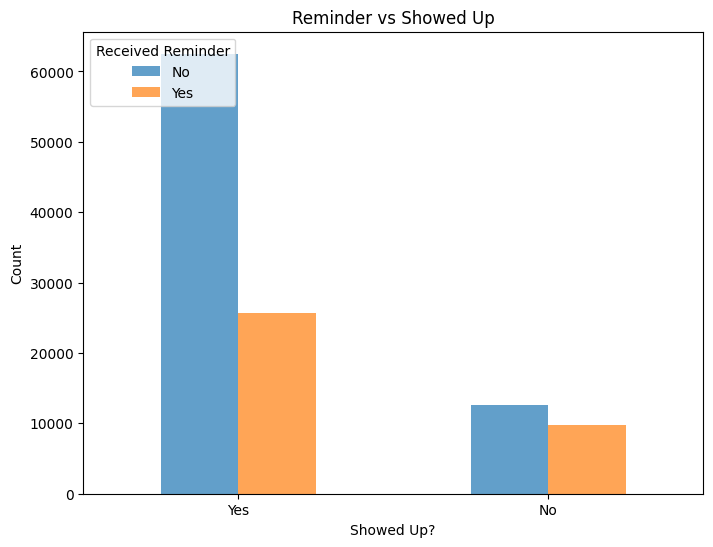

In [20]:
# Plotting a bar chart
counts = df.groupby(['No_show', 'SMS_received']).size().unstack(fill_value=0)
counts.index = ['Yes', 'No']
counts.plot(kind='bar', figsize=(8, 6), alpha=0.7)
plt.title('Reminder vs Showed Up')
plt.xlabel('Showed Up?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Received Reminder', loc='upper left', labels=['No', 'Yes'])
plt.show()

Most people who showed up for their appointment did not receive a reminder text. However, out of the people who did receive reminder texts (35,482), a majority did show up (25,698). Let's see if the percentage of people who showed up and received a reminder is greater than the percentage of people who showed up without a reminder.

In [21]:
# calculating percent who received a reminder and showed up
reminder_percent = (25698 / 35482) * 100
print(reminder_percent)

72.425455160363


In [22]:
# calculating percent of those who did not receive a reminder and showed up
no_reminder_percent = (62510 / 75045) * 100
print(no_reminder_percent)

83.29668865347458


Interestingly, the percentage of people who attended without a reminder text is greater than the percentage who did receive a text. Perhaps the hospitals should re-evaluate how their reminder texts are formatted.

# Question 3: Does the day of the week impact the number of no-shows?

day
0    22715
1    25640
2    25867
3    17247
4    19019
5       39
dtype: int64
Percentage of No-Shows per Weekday:
day
0    20.647149
1    20.093604
2    19.689179
3    19.354091
4    21.226142
5    23.076923
dtype: float64


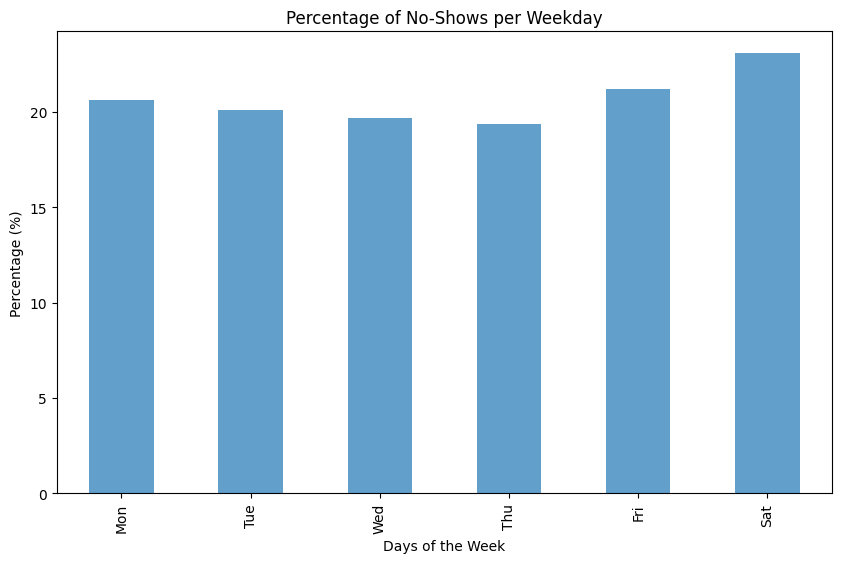

In [23]:
# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['day'] = df['AppointmentDay'].dt.dayofweek

# Calculate total appointments per weekday
total_appointments_per_weekday = df.groupby('day').size()
print(total_appointments_per_weekday)

# Calculate no-shows per weekday
no_show_counts_per_weekday = df[df['No_show'] == 'Yes'].groupby('day').size()

# Calculate percentage of no-shows per weekday
percentage_no_shows_per_weekday = (no_show_counts_per_weekday / total_appointments_per_weekday) * 100

# Fill NaN values with 0 (if there are weekdays with no no-shows)
percentage_no_shows_per_weekday = percentage_no_shows_per_weekday.fillna(0)

# Print the percentage of no-shows per weekday
print("Percentage of No-Shows per Weekday:")
print(percentage_no_shows_per_weekday)

# Plotting the percentages
plt.figure(figsize=(10, 6))

percentage_no_shows_per_weekday.plot(kind='bar', alpha=0.7)

# Adding titles and labels, not inluding a column for Sunday since there were 
# no appointments that day
plt.title('Percentage of No-Shows per Weekday')
plt.xlabel('Days of the Week')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=range(6), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Show the plot
plt.show()


We can see that the day with the highest percentage of no-shows is Saturday with 23%. However, this day also has the fewest appointments scheduled by far with only 39 scheduled on Saturdays. The next highest day for no-shows is Fridays at 21%. Wednesdays and Thursdays are the days with the lowest no-show percentage at approximately 19%. 

<a id='conclusions'></a>
## Conclusions

Our explorations of the dataset revealed that the overall no-show rate for appointments was 20.2%. Of our 110,527 scheduled appointments, 88,208 were attended. 

Of those who attended, 25,698 received reminder texts, meaning that most patients attended their appointment without a reminder. Eighty-three percent of patients who didn't receive a reminder showed up, while 72% of those who received a reminder text showed up. Based on this preliminary investigation, text reminders did not seem to increase attendance.

Days of the week may have an effect on appointment attendance. Saturdays were the worst-attended days with a 23% no-show rate. However, very few appointments were scheduled on Saturdays to begin with (only 39). The best attended days were Wednesdays and Thursdays with a 19% no-show rate. 

One limitation of this exploration is that there were only 62,299 unique patients vs the 110,527 appointments. We did not investigate how many repeat appointments were scheduled or no-showed by the same patient. 

Statistical tests were also not performed, so it is unknown if the effect of reminder texts or days of the week is statistically significant.

In [24]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 422974 bytes to Investigate_a_Dataset.html
